<div class="alert alert-block alert-success">
    
# FIT5201 Task 1
#### Student Name: Mohammed Hasan Uddin Quraishi
#### Student ID: 31064191
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[Model Complexity and Model Selection](#model) <br>
$\;$[Question 1 KNN Regressor](#knnregressor) <br>
$\;\;\;$[I Implement a KNN regressor using the scikit-learn](#implement) <br>
$\;\;\;$[II Test Implementation](#testimplement) <br>
$\;\;\;\;\;\;\;$[Load datasets](#loaddata) <br>
$\;\;\;\;\;\;\;$[Train/Test Split](#traintest) <br>
$\;\;\;\;\;\;\;$[Fit KNN Regressor](#fitknnregressor) <br>
$\;\;\;\;\;\;\;$[Report the training and test errors](#reporterror) <br>
$\;$[Question 2 L-fold Cross Validation](#lcrossval) <br>
$\;\;\;$[I Implement a L-Fold Cross Validation (CV)](#implementlfold) <br>
$\;\;\;$[II Systematically test L-Fold Cross Validation (CV)](#systemtest) <br>
$\;\;\;\;\;\;\;$[Evaluation Function](#evalfunc) <br>
$\;\;\;\;\;\;\;$[Test K from 1 to 50](#testk) <br>
$\;\;\;\;\;\;\;$[Compute Mean and Standard Deviation](#computemeanstd) <br>
$\;\;\;$[III Plot mean training and test errors](#plotmean) <br>
$\;\;\;\;\;\;\;$[Effect of parameter K](#effectk) <br>
$\;\;\;\;\;\;\;$[Effect of parameter l](#effectl) <br>
$\;$[Question 3 Automatic Model Selection](#automodel) <br>
$\;\;\;$[I Implement a version of the KNN regressor that automatically chooses an appropriate value of K](#choosek) <br>
$\;\;\;$[II Test your KNN regressor](#effectinternal)

In [1]:
#Importing necessary libraries

from scipy.spatial import KDTree
import numpy as np
from numpy import mean
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt

<div class="alert alert-block alert-warning">

## 1 Model Complexity and Model Selection <a class="anchor" name="model"></a>
    
</div>

<div class="alert alert-block alert-warning">

#### Question 1 KNN Regressor <a class="anchor" name="knnregressor"></a>
    
</div>

<div class="alert alert-block alert-warning">

##### I Implement a KNN regressor using the scikit-learn <a class="anchor" name="implement"></a>
    
</div>


Implement a KNN regressor using the scikit-learn conventations, i.e., in a class with the skeleton. We will be using the mean squared error as the measurement of training and test errors.

In [2]:
class KnnRegressor(BaseEstimator):

    def __init__(self, k):
        self.k = k

    def fit(self, x, y):
        self.y_train_ = y
        self.x_train_kdtree_ = KDTree(x)
        return self

        return prediction
    def predict(self, x):
        #kdtree.query returns:  distances which is not used hence _, neighbours will help identify position of nearest neighbours
        _, neighbours = self.x_train_kdtree_.query(x, k=self.k)
        #Matching the input shape with k
        neighbours = neighbours.reshape(len(x), self.k)
        neighbour_values = self.y_train_[neighbours]
        #obtain the mean of y train  for each indices
        return neighbour_values.mean(axis=1)

<div class="alert alert-block alert-warning">

##### II Test Implementation <a class="anchor" name="testimplement"></a>
    
</div>

<div class="alert alert-block alert-warning">

##### Load Dataset <a class="anchor" name="loaddata"></a>
    
</div>

Load Datasets and check out shapes and features to better understand the data. These datasets are being loaded from module sklearn.datasets.

In [3]:
#Loading diabetes dataset
diabetes_data = load_diabetes()

print(diabetes_data.data.shape)
print(diabetes_data.target.shape)
print(diabetes_data.feature_names)
print(diabetes_data.target[0:10])

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [4]:
california_housing_data = fetch_california_housing()

print(california_housing_data.data.shape)
print(california_housing_data.target.shape)
print(california_housing_data.feature_names)
print(california_housing_data.target_names)

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


<div class="alert alert-block alert-warning">

##### Train/Test Split <a class="anchor" name="traintest"></a>
    
</div>

Split the data into train test dataset using a fraction of 0.6 using the train)test split provided in the tutorial.

In [5]:
def train_test_split(x, y, train_size=0.6, random_state=None):
    RNG = np.random.default_rng(random_state)
    N = len(x)
    N_train = round(N*train_size)
    idx_train = RNG.choice(N, N_train, replace=False)
    idx_test = np.setdiff1d(np.arange(N), idx_train)
    RNG.shuffle(idx_test)
    return x[idx_train], x[idx_test], y[idx_train], y[idx_test]
# Split the datasets
diabetes_x_train, diabetes_x_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_data.data, diabetes_data.target, train_size=0.6,random_state=None)
california_housing_x_train, california_housing_x_test, california_housing_y_train, california_housing_y_test = train_test_split(california_housing_data.data, california_housing_data.target, train_size=0.6,random_state=None)

In [6]:
diabetes_x_train.shape,diabetes_x_test.shape,diabetes_y_train.shape,diabetes_y_test.shape

((265, 10), (177, 10), (265,), (177,))

In [7]:
california_housing_x_train.shape,california_housing_x_test.shape,california_housing_y_train.shape,california_housing_y_test.shape

((12384, 8), (8256, 8), (12384,), (8256,))

Both data has been seperated into train and test

<div class="alert alert-block alert-warning">

##### Fit KNN Regressor <a class="anchor" name="fitknnregressor"></a>
    
</div>

Here we Fit to the train portion of dataset and create train and test predict so that we can report the MSE based on both

In [8]:
#diabetes data
diabetes_knn = KnnRegressor(k=3)
diabetes_knn.fit(diabetes_x_train, diabetes_y_train)
y_hat_train_d = diabetes_knn.predict(diabetes_x_train)
y_hat_test_d = diabetes_knn.predict(diabetes_x_test)

#california housing data
housing_knn = KnnRegressor(k=3)
housing_knn.fit(california_housing_x_train, california_housing_y_train)
y_hat_train_h = housing_knn.predict(california_housing_x_train)
y_hat_test_h = housing_knn.predict(california_housing_x_test)

Here we fit the model based on the train set and have created two y hat of prediction for our train and test datset

<div class="alert alert-block alert-warning">

##### Report Train and Test Error <a class="anchor" name="reporterror"></a>
    
</div>

Mean Squared Error: This function will calculate the mean square error

Here we first find the total sum of squared errors and divide it by length to find the mean of squared errors

In [9]:
def mean_squared_error(y, y_hat):
    n = len(y)
    squared_errors = (y - y_hat) ** 2
    sum_of_squared_errors = sum(squared_errors)
    return sum_of_squared_errors/n

In [10]:
print("Mean Squared Error Diabetes train", mean_squared_error(diabetes_y_train,y_hat_train_d))
print("Mean Squared Error Diabetes test", mean_squared_error(diabetes_y_test,y_hat_test_d))

print("Mean Squared Error housing train", mean_squared_error(california_housing_y_train,y_hat_train_h))
print("Mean Squared Error housing test", mean_squared_error(california_housing_y_test,y_hat_test_h))

Mean Squared Error Diabetes train 1849.753878406709
Mean Squared Error Diabetes test 4682.388575015695
Mean Squared Error housing train 0.5842978555010225
Mean Squared Error housing test 1.2483032128714442


For both dataset we can see that train error is less than test. This is because the model was fit based on the train dataset.

<div class="alert alert-block alert-warning">

#### Question 2 L-fold Cross Validation <a class="anchor" name="lcrossval"></a>
    
</div>


<div class="alert alert-block alert-warning">

##### I Implement a L-Fold Cross Validation (CV) <a class="anchor" name="lcrossval"></a>
    
</div>

For each length of data and fold size we create number of folds. These will then determine and generate the train and test for each fold

In [11]:
class LFold:
  def __init__(self,l): # ADD PARAMETERS AS REQUIRED
  # Here l is the number of folds
    self.l = l
  def get_n_splits(self, x=None, y=None, groups=None):
    return self.l
  def split(self, x, y=None, groups=None):
  # YOUR CODE HERE
    n_samples = len(x)
    #Get number of fold size by dividing total samples by the number of folds
    fold_size = n_samples // self.l
    indices = np.arange(n_samples)#Randomly arrange all samples indices

    for i in range(self.l):
            #creating a random generator
            rng = np.random.default_rng()
            #Create permutation of indices
            indices = rng.permutation(indices)
            start = i * fold_size
            end  = (i+1) * fold_size
            test_idx = indices[start:end]
            #concatenating
            #train would be from after start till the end of indices set
            train_idx = np.concatenate([indices[:start], indices[end:]])
            yield train_idx, test_idx


Here we test a simple implementation which shows that the train test are randomly generated based on the lfold.

For example for a data of size 20 and fold l value of 5
Fold size will be 4

In [12]:
for idx_train, idx_test in LFold(5).split(list(range(20))):
  print(idx_train, idx_test)

[ 7  3 14  6 16  0  5 13 15  9 19  1 18  2 12 10] [17  8  4 11]
[16 10 14  3 19  0  7  9 17  4 15 11  1  8 12  2] [13 18  6  5]
[11  1 15 19  6  2  7 14 13 18 10  3  5  8 17 16] [ 0  9 12  4]
[19 17 11 14  4  2  1  5  0 12  8 13  9  7  3 15] [16 10  6 18]
[ 7 16  9 18  3 11  5  6  1 15 10 14 12  2  0  8] [13 17 19  4]



<div class="alert alert-block alert-warning">

##### II Systematically test L-Fold Cross Validation (CV) <a class="anchor" name="systemtest"></a>
    
</div>

<div class="alert alert-block alert-warning">

##### Evaluation function <a class="anchor" name="evalfunc"></a>
    
</div>

The evaluation function takes in the dataset and systematically performs cross validation for each k upto max_k size defined in the parameters using the previously created mean squared error as the scoring function

In [13]:
def evaluation(data,max_k, cv):
    r = cv.get_n_splits()
    test_results = np.zeros(shape=(r, max_k))
    train_results = np.zeros(shape=(r, max_k))
    for k in range(1, max_k+1):
        knn = KnnRegressor(k)
        #change scoring to mean squared error created above
        cv_res = cross_validate(knn, data.data, data.target, cv=cv, return_train_score=True, scoring=make_scorer(mean_squared_error))
        test_results[:, k-1] = cv_res['test_score']
        train_results[:, k-1] = cv_res['train_score']

    return train_results, test_results





<div class="alert alert-block alert-warning">

##### Test the effect of the KNN parameter K by testing all options from 1 to 50 <a class="anchor" name="testk"></a>
    
</div>

Here we use max_k =50 to systematically test using the evaluation function

In [14]:
max_k=50
l=5
# Test dataset on the evaluation function
# change cv to LFold
diabetes_train_results, diabetes_test_results = evaluation(data = diabetes_data, max_k=max_k, cv=LFold(l))
california_housing_train_results, california_housing_test_results = evaluation(data = california_housing_data, max_k=max_k, cv=LFold(l))


<div class="alert alert-block alert-warning">

##### Compute mean and standard deviation for each k of the MSE <a class="anchor" name="computemeanstd"></a>
    
</div>

In [15]:
mean_MSE_diabetes = np.mean(diabetes_test_results, axis = 0)
std_MSE_diabetes =np.std(diabetes_test_results, axis = 0)
mean_MSE_california_housing = np.mean(california_housing_test_results, axis = 0)
std_MSE_california_housing = np.std(california_housing_test_results, axis = 0)

print("Best k based on mean in diabetes dataset is: ", np.argmin(mean_MSE_diabetes))
print("Best k based on std in diabetes dataset is: ", np.argmin(std_MSE_diabetes))
print("Best k based on mean in california housing dataset is: ", np.argmin(mean_MSE_california_housing))
print("Best k based on std in california housing dataset is: ", np.argmin(std_MSE_california_housing))


Best k based on mean in diabetes dataset is:  14
Best k based on std in diabetes dataset is:  37
Best k based on mean in california housing dataset is:  7
Best k based on std in california housing dataset is:  10


The above output displays the best k based on mean and std


<div class="alert alert-block alert-warning">

##### III Plot the mean training and test errors against the choice of K with error bars (using the standard error of the mean) <a class="anchor" name="plotmean"></a>
    
</div>

<div class="alert alert-block alert-warning">

##### Effect of parameter k<a class="anchor" name="effectk"></a>
    
</div>

Here we use the function below to calculate the standard error for the error bars for each k
\begin{equation*}
ste = \frac{1.96s}{L^2}
\end{equation*}

For both datasets we can see a pattern. As the number of K folds decrease it overfits to the training set. Thus for train set we have very less error rate. However we obtain a best k at the arm as the model error is more lower and works well with test test. To note that as the k number increases the model moves towards underfitting. We can clearly see that the model is moving towards higher train errors and test errors.

For Diabetes dataset model overfits until k=6 and we get our best k 14 and then the model starts moving towards uunderfittig.

For the california housing dataset we get k=7 as the best k before which it overfits. As the datset is larger we can clearly see that the model is rogressing towards overfitting as the model approaches larger k values.

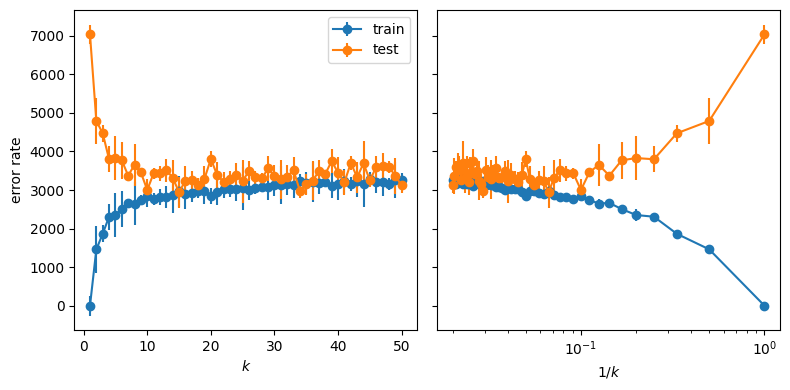

In [16]:
from matplotlib import pyplot as plt
import numpy as np
ks = np.arange(1, max_k+1)
_, axs = plt.subplots(1, 2, figsize=(8,4), tight_layout=True, sharey=True)
z = (l**0.5)/1.96
axs[0].errorbar(ks, diabetes_train_results.mean(axis=0), yerr=diabetes_test_results.std(axis=0)/z, marker='o', label='train')
axs[0].errorbar(ks, diabetes_test_results.mean(axis=0), yerr=diabetes_test_results.std(axis=0)/z, marker='o', label='test')
axs[0].legend()
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('error rate')
axs[1].errorbar(1/ks, diabetes_train_results.mean(axis=0), yerr=diabetes_train_results.std(axis=0)/z, marker='o', label='train')
axs[1].errorbar(1/ks, diabetes_test_results.mean(axis=0), yerr=diabetes_test_results.std(axis=0)/z, marker='o', label='test')
axs[1].set_xscale('log')
axs[1].set_xlabel('$1/k$')
plt.show()

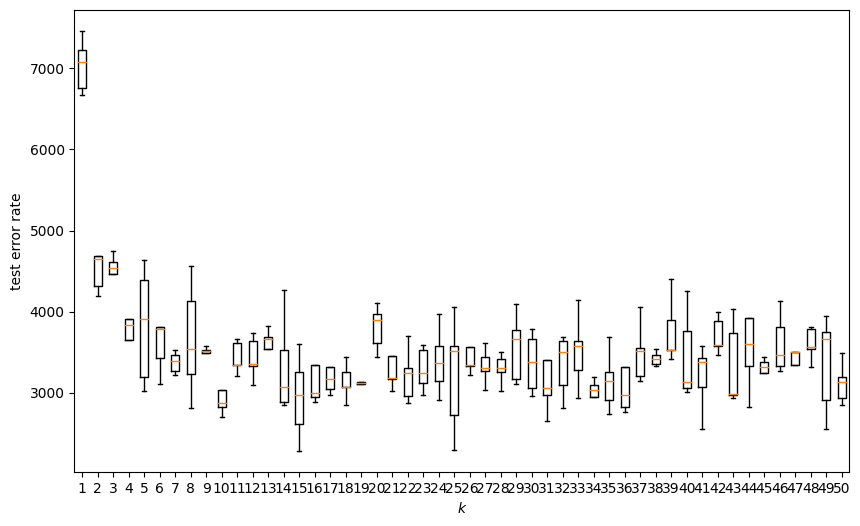

In [17]:
plt.figure(figsize=(10,6))
plt.boxplot(diabetes_test_results, showfliers=False)
plt.ylabel('test error rate')
plt.xlabel('$k$')
plt.show()

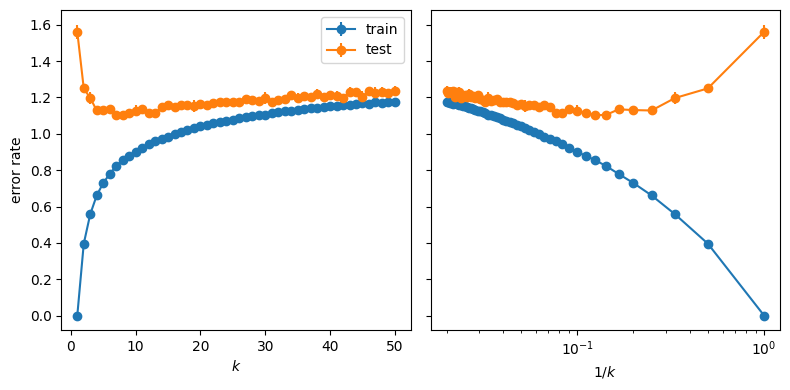

In [18]:
from matplotlib import pyplot as plt
import numpy as np
ks = np.arange(1, max_k+1)
_, axs = plt.subplots(1, 2, figsize=(8,4), tight_layout=True, sharey=True)
z = (l**0.5)/1.96
axs[0].errorbar(ks, california_housing_train_results.mean(axis=0), yerr=california_housing_train_results.std(axis=0)/z, marker='o', label='train')
axs[0].errorbar(ks, california_housing_test_results.mean(axis=0), yerr=california_housing_test_results.std(axis=0)/z, marker='o', label='test')
axs[0].legend()
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('error rate')
axs[1].errorbar(1/ks, california_housing_train_results.mean(axis=0), yerr=california_housing_train_results.std(axis=0)/z, marker='o', label='train')
axs[1].errorbar(1/ks, california_housing_test_results.mean(axis=0), yerr=california_housing_test_results.std(axis=0)/z, marker='o', label='test')
axs[1].set_xscale('log')
axs[1].set_xlabel('$1/k$')
plt.show()

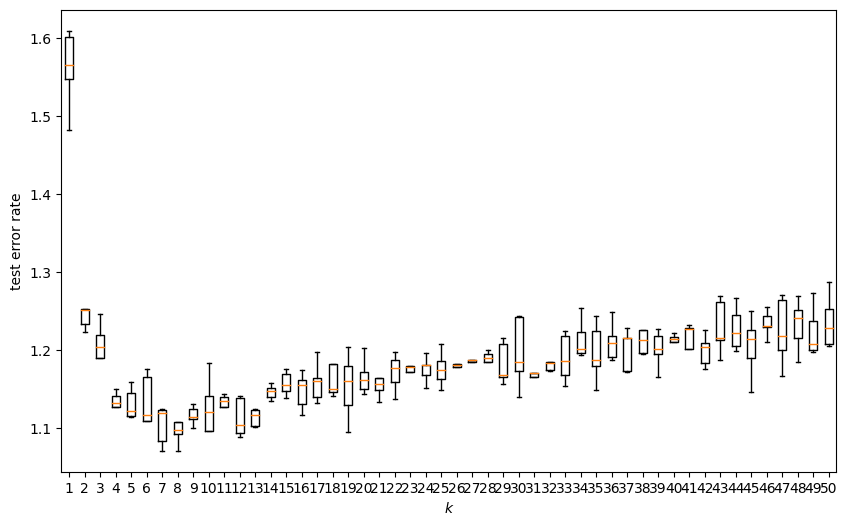

In [19]:
plt.figure(figsize=(10,6))
plt.boxplot(california_housing_test_results, showfliers=False)
plt.ylabel('test error rate')
plt.xlabel('$k$')
plt.show()

<div class="alert alert-block alert-warning">

##### Effect of parameter L of the CV procedure<a class="anchor" name="effectl"></a>
    
</div>

From the tutorial we alternate the code to create L folds of our evaluation function so that we can test KNN regressor for different values of lfold cross validation

In [20]:
folds = [10,25,50]

#For each fold we will sacer the train test errors accordingly with max_k of 50
def multi_l_folds(data,folds):
  train_results = []
  test_results = []
  for l in folds:
      print('l: ', l)
      train_res, test_res =evaluation(data, max_k=max_k, cv= LFold(l))
      train_results.append(train_res)
      test_results.append(test_res)
  return train_results,test_results

In [21]:
train_results_lfold,test_results_lfold=multi_l_folds(diabetes_data,folds)

l:  10
l:  25
l:  50


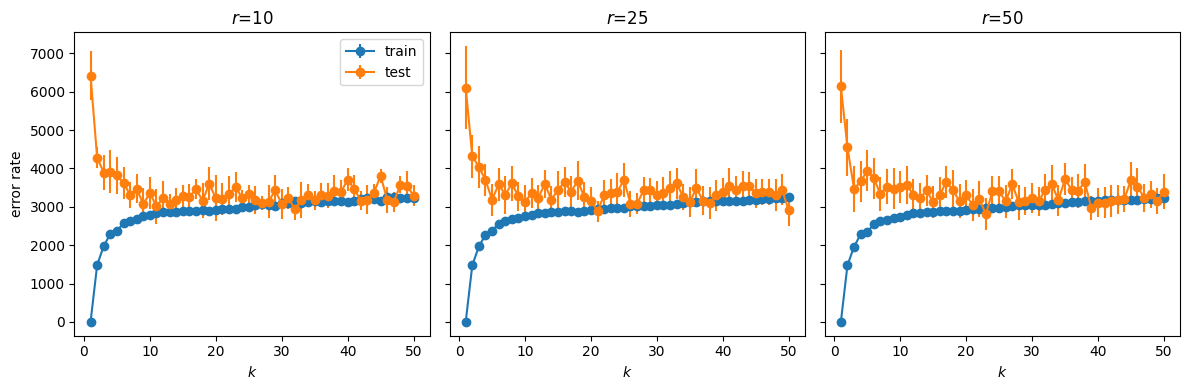

In [22]:
ks = np.arange(1, max_k+1)
_, axs = plt.subplots(1, len(folds), figsize=(4*len(folds),4), tight_layout=True, sharey=True)
for i, r in enumerate(folds):
    z = r**0.5/1.96
    axs[i].set_title(f'$r$={r}')
    axs[i].errorbar(ks, train_results_lfold[i].mean(axis=0), yerr=train_results_lfold[i].std(axis=0)/z, marker='o', label='train')
    axs[i].errorbar(ks, test_results_lfold[i].mean(axis=0), yerr=test_results_lfold[i].std(axis=0)/z, marker='o', label='test')
    axs[i].set_xlabel('$k$')
axs[0].legend()
axs[0].set_ylabel('error rate')
plt.show()

In [23]:
train_results_lfold,test_results_lfold=multi_l_folds(california_housing_data,folds)

l:  10
l:  25
l:  50


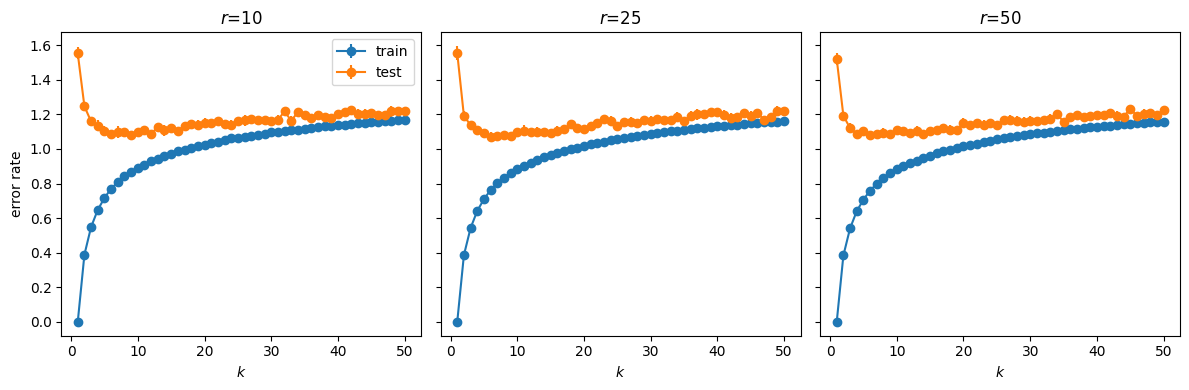

In [24]:
ks = np.arange(1, max_k+1)
_, axs = plt.subplots(1, len(folds), figsize=(4*len(folds),4), tight_layout=True, sharey=True)
for i, r in enumerate(folds):
    z = r**0.5/1.96
    axs[i].set_title(f'$r$={r}')
    axs[i].errorbar(ks, train_results_lfold[i].mean(axis=0), yerr=train_results_lfold[i].std(axis=0)/z, marker='o', label='train')
    axs[i].errorbar(ks, test_results_lfold[i].mean(axis=0), yerr=test_results_lfold[i].std(axis=0)/z, marker='o', label='test')
    axs[i].set_xlabel('$k$')
axs[0].legend()
axs[0].set_ylabel('error rate')
plt.show()

For both dataset we can see with number increase of fold the graph tends to be more smoother and less noise. The original trend of graph is similar over all.

<div class="alert alert-block alert-warning">

#### Question 3 Automatic Model Selection <a class="anchor" name="automodel"></a>
    
</div>

<div class="alert alert-block alert-warning">

##### I Implement a version of the KNN regressor that automatically chooses an appropriate value of K from a list of options by performing an internal cross-validation on the training set at fitting time<a class="anchor" name="choosek"></a>
    
</div>

In [25]:
from sklearn.base import BaseEstimator
class KnnRegressorCV(BaseEstimator):
    def __init__(self, ks=list(range(1, 21)), cv=LFold(5)):
      self.ks = ks
      self.cv = cv
    def fit(self, x, y):
      best_k = None
      best_score = float('inf')
      l = self.cv.get_n_splits()
      print(self.ks)
      for k in self.ks:#for each k
        knn = KnnRegressor(k)
        cv_results = cross_validate(knn, x, y, cv=self.cv, return_train_score=False, scoring=make_scorer(mean_squared_error))
        avg_score = np.mean(cv_results['test_score'])

        if avg_score < best_score:
                best_score = avg_score
                best_k = k
      self.k_ = best_k
      print(f'Best internal k: {self.k_}.')
      return self
    def predict(self, x):
        _, neighbours = self.x_train_kdtree_.query(x, k=self.k)
        neighbours = neighbours.reshape(len(x), self.k)
        neighbour_values = self.y_train_[neighbours]
        return neighbour_values.mean(axis=1)

<div class="alert alert-block alert-warning">

##### II test your KNN regressor with internal CV by using either an outer single train/test-split or ideally, with an outer cross-validation<a class="anchor" name="effectinternal"></a>
    
</div>

In [26]:
#diabetes dataset
print('Diabetes:')
diabetes_auto = KnnRegressorCV(ks=list(range(1,21)), cv = LFold(5))
diabetes_auto.fit(diabetes_x_train, diabetes_y_train)

# Test dataset on the evaluation function
diabetes_train_results_auto, diabetes_test_results_auto = evaluation(data = diabetes_data, max_k=max_k, cv=LFold(l))
mean_MSE_diabetes_auto = np.mean(diabetes_test_results_auto, axis = 0)
print(f'External K for Diabetes based on mean of MSE is {np.argmin(mean_MSE_diabetes_auto)}.')

print('California Housing:')
california_auto = KnnRegressorCV(ks=list(range(1,21)), cv = LFold(5))
california_auto.fit(diabetes_x_train, diabetes_y_train)

# Test dataset on the evaluation function
california_housing_test_results_auto, california_test_results_auto = evaluation(data = california_housing_data, max_k=max_k, cv=LFold(l))
mean_MSE_california_housing_auto = np.mean(california_test_results_auto, axis = 0)
print(f'External K for Diabetes based on mean of MSE is {np.argmin(mean_MSE_california_housing)}.')


Diabetes:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Best internal k: 16.
External K for Diabetes based on mean of MSE is 25.
California Housing:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Best internal k: 17.
External K for Diabetes based on mean of MSE is 7.


Q. Report on the (mean) k value that is chosen by the KNN regressor with internal crossvalidation and whether it corresponds to the best k-value with respect to the outer test
sets.

A. The internal and eternal k are close for both cross valdation. Internal CV is good for values if hypermaters do not cause overfitting.

Q. Comment on what factors determine whether the internal cross-validation procedure is
successful in approximately selecting the best model.

A. However if data set is small the model will under fit and accuracy of cv will be small.Choosing appropriate error function may change the outcome.

References

1. Activity 1 2 3 from tutorial
2. data:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html,
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html ,
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

3. Total Conditional Probability:
https://corporatefinanceinstitute.com/resources/data-science/total-probability-rule/#:~:text=The%20Total%20Probability%20Rule%20(also,probabilities%20of%20several%20distinct%20events.

4. Conditional and Bayes rule:
https://stats.libretexts.org/Courses/Saint_Mary's_College_Notre_Dame/MATH_345__-_Probability_(Kuter)/2%3A_Computing_Probabilities/2.2%3A_Conditional_Probability_and_Bayes'_Rule

5. Change to one dimension flat array: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

6. knn regressor:
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

7. Analysis and markdown guide:
https://chat.openai.com/

8.Ridge regression help:
https://www.springboard.com/blog/data-science/ridge-regression-python/


